In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from scipy import stats
from scipy.stats import entropy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
eps = 2e-10

In [2]:
df = pd.read_csv('Lorenz_System_Features.csv' , index_col=0 )
df

,X Axis,Y Axis,Z Axis,Rho,Initial Value,Predictability,Self-Organization,Emergence,Complexity,Equilibrium Point,Pitchfork Bifurcation,Hopf
0,1.0,0.0,0.0,0.1,-1.610962,0.438932,0.859095,0.142702,0.122594,1.0,0.0,0.0
1,1.0,0.0,0.0,0.2,-1.505067,0.381930,0.856755,0.149617,0.128185,1.0,0.0,0.0
2,1.0,0.0,0.0,0.3,0.181033,0.371318,0.302015,1.457741,0.440260,1.0,0.0,0.0
3,1.0,0.0,0.0,0.4,-1.926214,0.557502,0.280060,1.072779,0.300442,1.0,0.0,0.0
4,1.0,0.0,0.0,0.5,-0.002124,0.465651,0.344804,1.290810,0.445077,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11965,0.0,0.0,1.0,39.5,0.649122,-0.097561,0.033211,2.101682,0.069800,0.0,0.0,1.0
11966,0.0,0.0,1.0,39.6,1.113665,0.062400,0.030519,2.120663,0.064721,0.0,0.0,1.0
11967,0.0,0.0,1.0,39.7,0.045379,-0.198905,0.049653,2.025231,0.100559,0.0,0.0,1.0
11968,0.0,0.0,1.0,39.8,-0.828646,0.106819,0.099131,1.852800,0.183670,0.0,0.0,1.0


In [3]:
X = df.drop('Equilibrium Point' , axis=1)
X = X.drop('Pitchfork Bifurcation' , axis=1)
X = X.drop('Hopf' , axis=1)
X = X.drop('Rho' , axis=1)
y = df['Hopf']

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

In [5]:
######################  SVC #####################:
tuned_parameters = [{'kernel': ['rbf' , 'linear' , 'poly'], 'gamma': [1e-3],
                     'C': [1, 10 , 100]}]

print("# Tuning hyper-parameters ...")
print()

clf = GridSearchCV(svm.SVC(), tuned_parameters)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters ...

Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.701 (+/-0.004) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.805 (+/-0.011) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.617 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.775 (+/-0.010) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.806 (+/-0.011) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.617 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.806 (+/-0.012) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.806 (+/-0.011) for {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.617 (+/-0.000) for {'C': 100, 'gamma': 0.001, 'kernel': 'poly'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      3004
         1

In [6]:
######################  KNN #####################:
tuned_parameters = [{'n_neighbors': np.arange(3,16)}]
print("# Tuning hyper-parameters ...")
print()
clf_score = np.array([])
ne_range = range(3,16)
for n in ne_range:
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    clf_score = np.append(clf_score , clf.score(X_test , y_test))
clf = KNeighborsClassifier(n_neighbors = ne_range[np.argmax(clf_score)])
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test)
print('The best parameter is: {} neigbors'.format(ne_range[np.argmax(clf_score)]))
print()
print(classification_report(y_true, y_pred))

# Tuning hyper-parameters ...

The best parameter is: 5 neigbors

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      3004
         1.0       0.83      0.81      0.82      1784

    accuracy                           0.87      4788
   macro avg       0.86      0.86      0.86      4788
weighted avg       0.87      0.87      0.87      4788



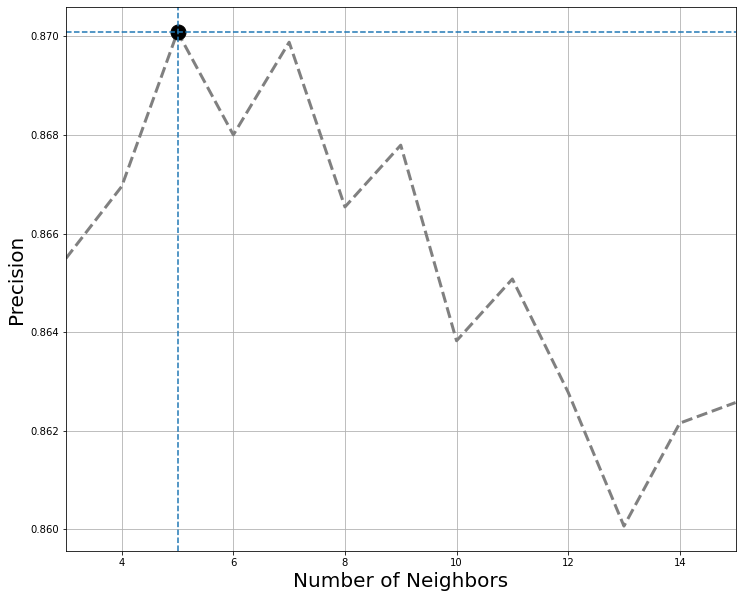

In [7]:
plt.figure(figsize = (12,10))
plt.plot(ne_range , clf_score , linewidth = 3 , linestyle = 'dashed',
        c='grey')
plt.plot(ne_range[np.argmax(clf_score)] , np.max(clf_score), 
         linewidth = 0 , marker = 'o', markersize = 15,
        c='black')
plt.axhline(y = np.max(clf_score) , xmin=0 , xmax=1 , linestyle = 'dashed')
plt.axvline(x = ne_range[np.argmax(clf_score)] ,ymin=0 , ymax=1 , linestyle = 'dashed')
plt.xlim([3,15])
plt.grid()
plt.xlabel('Number of Neighbors' , fontsize = 20)
plt.ylabel('Precision' , fontsize = 20)
plt.savefig('Figure2.png')

In [8]:
######  Random Forest #####################:
tuned_parameters = [{'n_estimators': [100 , 150 , 200],
                     'max_depth':[5,10,15,20]}]
print("# Tuning hyper-parameters ...")
print()
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters ...

Best parameters set found on development set:

{'max_depth': 20, 'n_estimators': 200}

Grid scores on development set:

0.837 (+/-0.008) for {'max_depth': 5, 'n_estimators': 100}
0.834 (+/-0.012) for {'max_depth': 5, 'n_estimators': 150}
0.834 (+/-0.007) for {'max_depth': 5, 'n_estimators': 200}
0.898 (+/-0.007) for {'max_depth': 10, 'n_estimators': 100}
0.899 (+/-0.006) for {'max_depth': 10, 'n_estimators': 150}
0.898 (+/-0.005) for {'max_depth': 10, 'n_estimators': 200}
0.918 (+/-0.004) for {'max_depth': 15, 'n_estimators': 100}
0.918 (+/-0.007) for {'max_depth': 15, 'n_estimators': 150}
0.917 (+/-0.004) for {'max_depth': 15, 'n_estimators': 200}
0.920 (+/-0.008) for {'max_depth': 20, 'n_estimators': 100}
0.921 (+/-0.009) for {'max_depth': 20, 'n_estimators': 150}
0.922 (+/-0.009) for {'max_depth': 20, 'n_estimators': 200}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation s

In [9]:
clf_rf = RandomForestClassifier(max_depth = clf.best_params_['max_depth'],
                                n_estimators = clf.best_params_['n_estimators'] )
clf_rf.fit(X_train, y_train)
importance = clf_rf.feature_importances_

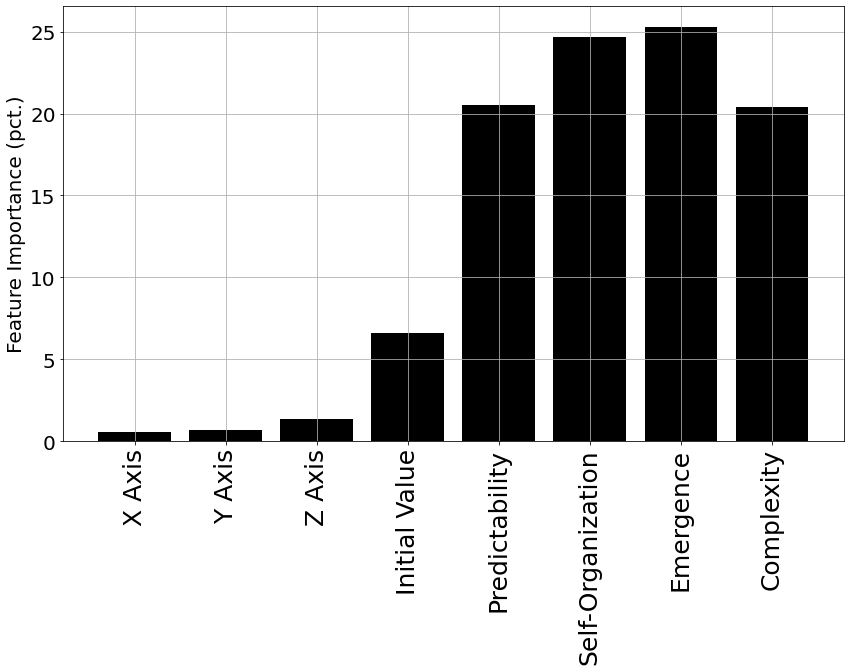

In [10]:
plt.figure(figsize = (14,8))
plt.bar(X.columns , 100*importance , color = 'black')
#plt.title('Feature Importance of Chaotic Time-Series Classification' , fontsize = 15)
plt.xticks(rotation=90 , fontsize = 25)
plt.yticks(fontsize = 20)
plt.ylabel('Feature Importance (pct.)' , fontsize = 20)
plt.grid()
plt.savefig('Figure3.png'  , bbox_inches='tight')